# Plot Scores for Columns of MSA

## Import and Clean Data

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

in_fh = r"D:\Orthologs\Ortholog_Codon_Dist\PTHR30560\P0A850_ortholog_msa_scores.data"

df = pd.read_csv(in_fh)

In [2]:
# remove columns with no information
df_clean = df[df.Identity != 'X']

print(len(df_clean), "columns used in analysis.\n")

# convert values in columns Percent ID and on to floats
df_clean[df_clean.columns[1:]] = df_clean[df_clean.columns[1:]].astype('float')
df_clean.dtypes

119 columns used in analysis.



c:\python37\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Identity                object
Percent Identity       float64
Avg Blosum62 Score     float64
Avg Frequency Score    float64
Fraction Aligned       float64
Fraction Disordered    float64
dtype: object

## Distributions of Each Score

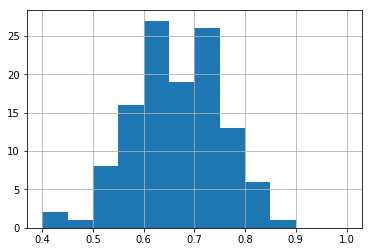

In [3]:
df_clean['Avg Frequency Score'].hist(bins = np.arange(0.4, 1.01, 0.05));

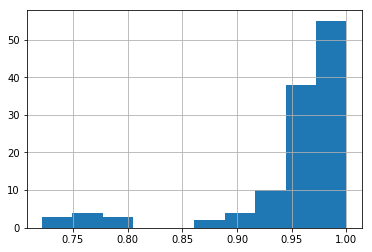

In [4]:
df_clean['Fraction Aligned'].hist();

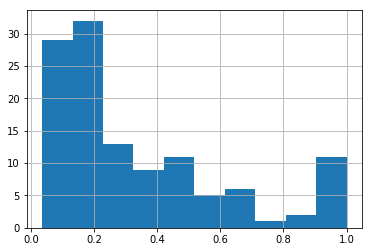

In [5]:
df_clean['Fraction Disordered'].hist();

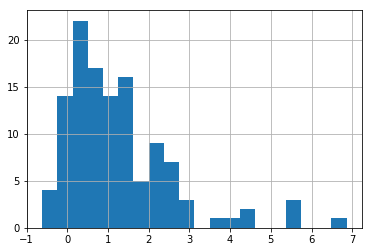

In [6]:
df_clean['Avg Blosum62 Score'].hist(bins = 20);

## Plot Column Scores

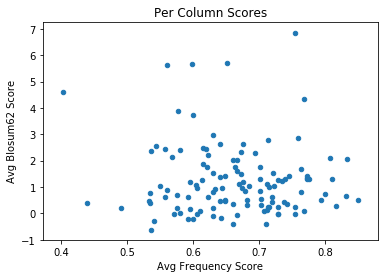

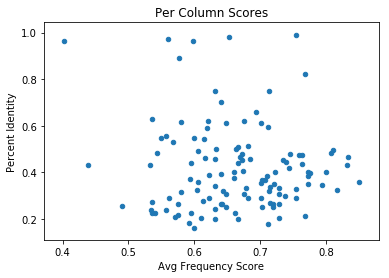

In [7]:
# matplotlib backend to plot dataframe
df_clean.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores')
df_clean.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores');

Disorder Split at 50% for same scores above

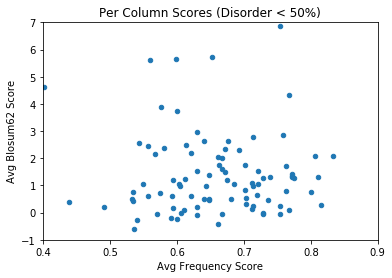

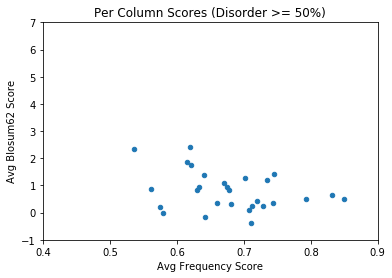

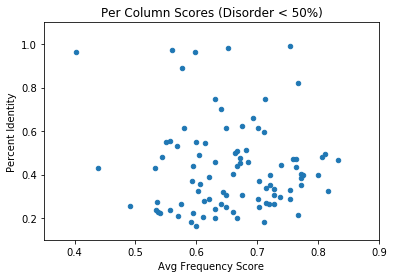

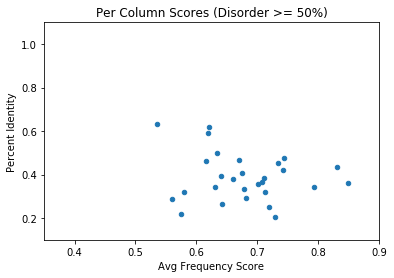

In [8]:
df_clean_dis1 = df_clean[df_clean['Fraction Disordered'] < 0.5]
df_clean_dis2 = df_clean[df_clean['Fraction Disordered'] >= 0.5]

df_clean_dis1.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores (Disorder < 50%)')
plt.xlim([0.4, 0.9])
plt.ylim([-1, 7])
df_clean_dis2.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores (Disorder >= 50%)')
plt.xlim([0.4, 0.9])
plt.ylim([-1, 7])
df_clean_dis1.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores (Disorder < 50%)')
plt.xlim([0.35, 0.9])
plt.ylim([0.1, 1.1])
df_clean_dis2.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores (Disorder >= 50%)')
plt.xlim([0.35, 0.9])
plt.ylim([0.1, 1.1]);

Attempting to filter by fraction aligned produced no differences (maybe shrink size of window)

In [16]:
print(min(df_clean['Fraction Aligned']))

0.7217391304347827


In [17]:
df_clean_25 = df_clean[df_clean['Fraction Aligned'] <= 0.25]
df_clean_25

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered


In [18]:
df_clean_50 = df_clean[(df_clean['Fraction Aligned'] <= 0.50) & (df_clean['Fraction Aligned'] > 0.25)]
df_clean_50

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered


In [19]:
df_clean_75 = df_clean[(df_clean['Fraction Aligned'] <= 0.75) & (df_clean['Fraction Aligned'] > 0.50)]
df_clean_75

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered
637,V,0.630952,2.354274,0.535714,0.730435,0.988095
1524,L,0.406977,0.952941,0.674419,0.747826,0.837209
1601,x,0.385542,-0.398472,0.710843,0.721739,1.000000


In [20]:
df_clean_100 = df_clean[(df_clean['Fraction Aligned'] <= 1.0) & (df_clean['Fraction Aligned'] > 0.75)]
df_clean_100

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered
638,T,0.344828,0.511361,0.793103,0.756522,0.988506
647,V,0.367925,0.090925,0.707547,0.921739,0.990566
648,E,0.377358,0.356155,0.660377,0.921739,1.000000
649,T,0.216981,0.192992,0.575472,0.921739,0.971698
650,E,0.264151,-0.171249,0.641509,0.921739,0.952830
651,E,0.289720,0.876565,0.560748,0.930435,0.906542
652,N,0.252336,0.420384,0.719626,0.930435,0.831776
653,S,0.317757,0.002292,0.579439,0.930435,0.738318
654,K,0.205607,0.226944,0.728972,0.930435,0.616822
655,V,0.342342,0.816708,0.630631,0.965217,0.549550


## Distribution of Each Score Split at 50% Disorder

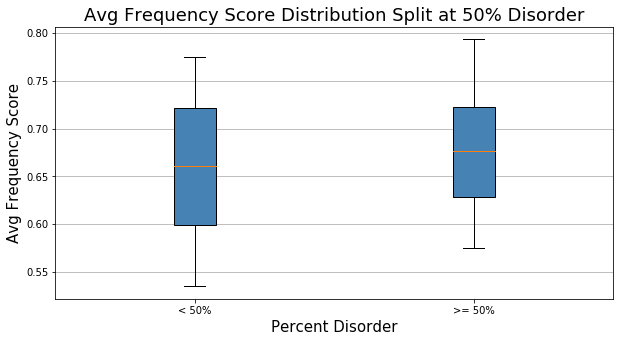

In [21]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_dis1["Avg Frequency Score"], df_clean_dis2["Avg Frequency Score"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2], ["< 50%", ">= 50%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Frequency Score", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Frequency Score Distribution Split at 50% Disorder', fontsize=18);


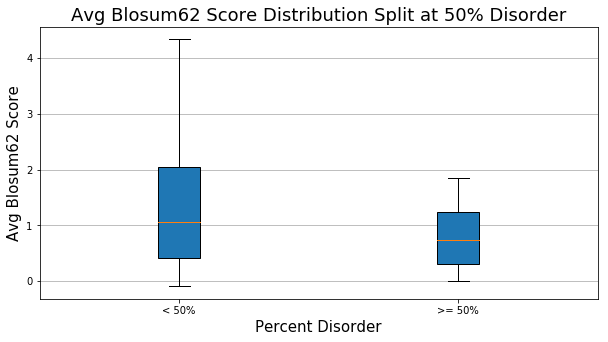

In [22]:
plt.figure(figsize=(10, 5))
plt.grid(True, axis='y')

boxplot = plt.boxplot([df_clean_dis1['Avg Blosum62 Score'], df_clean_dis2['Avg Blosum62 Score']], whis=[5, 95], showfliers=False,
                      patch_artist=True)

plt.xticks([1,2], ["< 50%", ">= 50%"])
plt.ylabel('Avg Blosum62 Score', fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Blosum62 Score Distribution Split at 50% Disorder', fontsize=18);

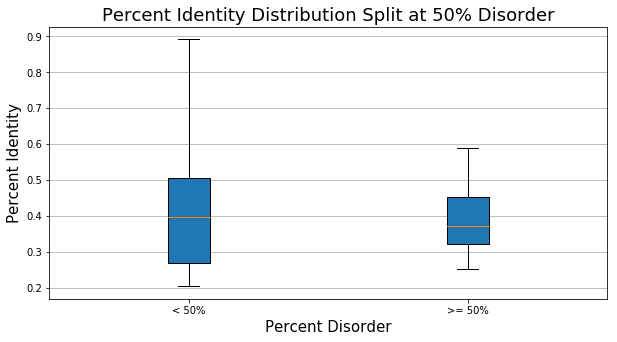

In [23]:
plt.figure(figsize=(10, 5))
plt.grid(True, axis='y')

boxplot = plt.boxplot([df_clean_dis1['Percent Identity'], df_clean_dis2['Percent Identity']], whis=[5, 95], showfliers=False,
                      patch_artist=True)

plt.xticks([1,2], ["< 50%", ">= 50%"])
plt.ylabel('Percent Identity', fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Percent Identity Distribution Split at 50% Disorder', fontsize=18);

## Plot Scores with Disorder

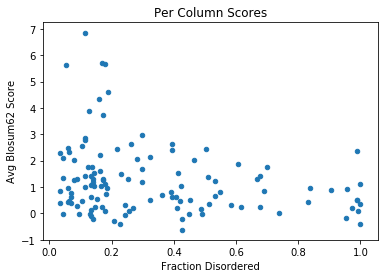

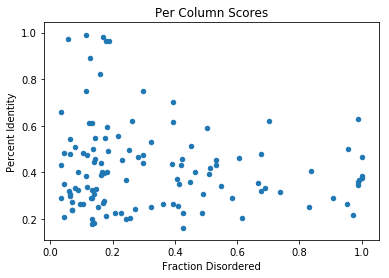

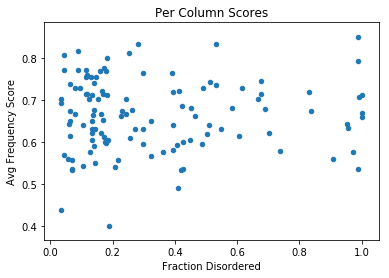

In [24]:
df_clean.plot.scatter('Fraction Disordered', 'Avg Blosum62 Score', title='Per Column Scores')
df_clean.plot.scatter('Fraction Disordered', 'Percent Identity', title='Per Column Scores')
df_clean.plot.scatter('Fraction Disordered', 'Avg Frequency Score', title='Per Column Scores');

# Fraction Disorder Filters

In [25]:
df_clean_25d = df_clean[df_clean['Fraction Disordered'] <= 0.25]
len(df_clean_25d)

64

In [26]:
df_clean_50d = df_clean[(df_clean['Fraction Disordered'] <= 0.50) & (df_clean['Fraction Disordered'] > 0.25)]
len(df_clean_50d)

27

In [27]:
df_clean_75d = df_clean[(df_clean['Fraction Disordered'] <= 0.75) & (df_clean['Fraction Disordered'] > 0.50)]
len(df_clean_75d)

15

In [28]:
df_clean_100d = df_clean[(df_clean['Fraction Disordered'] <= 1.0) & (df_clean['Fraction Disordered'] > 0.75)]
len(df_clean_100d)

13